In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = df = pd.read_csv('./embeddings_combined.csv')

In [3]:
df_usa = df[df['country'] == 'US']

df_usa_narrow = df_usa.drop(columns=['companyName', 'Symbol', 'country', 'industry', 'ipoDate'])


X = df_usa_narrow.drop('sector', axis=1)  # Feature matrix
y = df_usa_narrow['sector']  # Target variable - sector

# We have far too many for this computation. Take the first 3000
X = X.iloc[:3000]
y = y.iloc[:3000]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 2000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [6]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Generating the Classification Report
print(classification_report(y_test, y_pred))

[[ 14   0   0   0   1   0   1   9   1   0   1]
 [  0  15   4   1   0   1   0   1   0   4   0]
 [  0   2  34   1   0   2   1   8   0   1   0]
 [  0   0   4  17   0   1   2   1   0   0   0]
 [  1   0   0   0  27   1   0   1   0   0   0]
 [  0   4   4   0   0 109   2   3   3   1   0]
 [  0   2   0   2   0   4 121   0   1   0   0]
 [  4   2   7   1   0   3   1  44   1   6   0]
 [  0   0   0   0   2   2   2   0  17   1   0]
 [  1   5   2   1   0   4   3   9   1  58   0]
 [  0   0   0   0   0   0   0   0   0   1   9]]
                        precision    recall  f1-score   support

       Basic Materials       0.70      0.52      0.60        27
Communication Services       0.50      0.58      0.54        26
     Consumer Cyclical       0.62      0.69      0.65        49
    Consumer Defensive       0.74      0.68      0.71        25
                Energy       0.90      0.90      0.90        30
    Financial Services       0.86      0.87      0.86       126
            Healthcare       0.91

In [7]:
#Our model has the easiest time determining companies in Energy, Healthcare, and Utilities. 
#Our model has the most difficult time determining companies in Communication Services, Industrials, Consumer Cyclical.

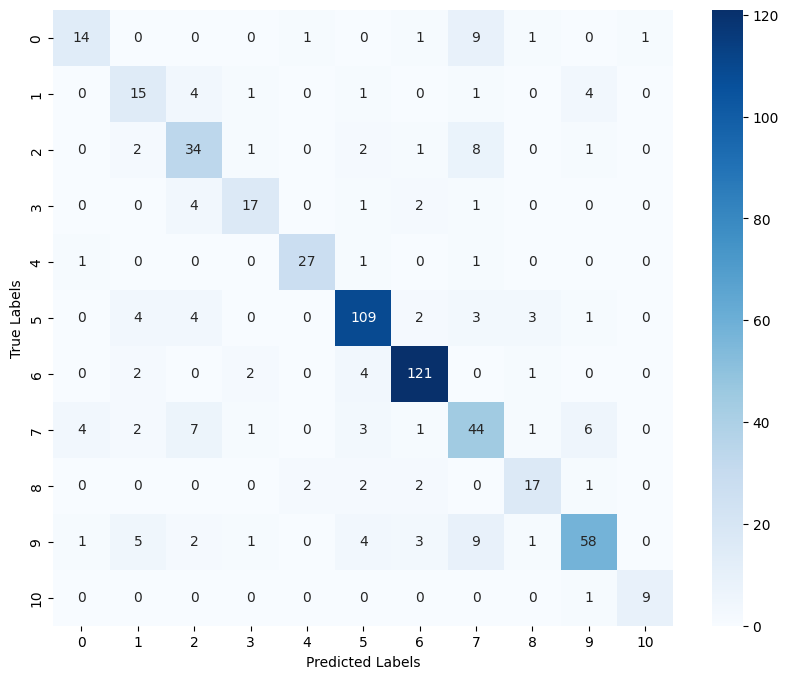

Accuracy: 0.7750
F1 Score: 0.7755
Recall: 0.7750


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,  average='weighted')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

In [ ]:
df_usa_narrow = df_usa.drop(columns=['companyName', 'Symbol', 'country', 'sector', 'ipoDate'])


X = df_usa_narrow.drop('industry', axis=1)  # Feature matrix
y = df_usa_narrow['industry']  # Target variable - sector

# We have far too many for this computation. Take the first 3000
X = X.iloc[:3000]
y = y.iloc[:3000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 2000)

model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Generating the Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,  average='weighted')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")